# Neural Networks for Data Science Applications
## Homework 1: Customized activation functions

**Name**: *\<BOULEDROUA Noah\>*

**Matricola**: *\<2181745\>*

> ✍ Upload the completed notebook **before 13/11/2024 at 23:59** on the Google Classroom page.

### Instructions

1. The homework is divided into four mandatory exercises (**5 points in total**) and 1 optional exercise. The optional one is ungraded but I may take it into consideration for the final mark during the oral.
2. Completing the homework successfully will remove 1 exercise from the end-of-term homework.
3. Marks between 4 and 5 can be fully recovered during the oral examination.
3. If you want to improve the mark, you are also free to complete the full EoT homework to recover a full mark.
3. The grade can be kept for the entire academic year (up to October 2025).

**IMPORTANT - read carefully before starting**:

> 🟨 *External material*: if you use any external material or inspiration for the code, reference it *explicitly* in the corresponding cell. For the textual descriptions, copy-paste *is not allowed*. <ins>Not following these two points is an immediate 0 mark</ins>.

> 🔵 *Grammar*: for the textual descriptions, I will remove points for too many grammatical or textual errors. Please try to be precise and provide nice-to-read descriptions, like if you were writing a report.

> 🟥 *Vectorization and JAX*: the homework must be done _fully in JAX_ (except where specified) while vectorizing the code as much as possible (e.g., do not loop explicitly over the batch dimension).

> 🟪 *Math*: you can also use LaTeX in Markdown if you need to write equations or if you need generic math notation.

### Introduction: Trainable activation functions

Remember that a trainable variant of the Swish function can be written as:

$$ \phi(s) = (as + b)\sigma(cs + d) $$

where $s$ is the scalar input of the AF, $\left\{a, b, c, d\right\}$ are four scalar parameters, and $\sigma$ is the sigmoid function. Note how this can be (roughly) interpreted as a one-hidden layer MLP with one input, one hidden unit, and one output. Thus, we can easily generalize this as:

$$ \phi(s) = \sum_{i=1}^n (a_is+b_i)\sigma(c_is+d_i) \tag{1} $$

where $n$ is an hyper-parameter, and the function has now $4n$ parameters $\left\{a_i, b_i, c_i, d_i\right\}_{i=1}^n$. By varying $n$ we can make the activation function as complicated as we want: we say this is a **non-parametric** AF [1]. The homework will guide you to implement an MLP exploiting (1) in JAX.

In [ ]:
%pip install jaxtyping --quiet

In [ ]:
import numpy as np

In [ ]:
import jax
import jax.numpy as jnp
from typing import Tuple
from jaxtyping import Array, Float, Int

### Exercise 1 (1 point)

We begin by implementing (1) (no MLPs for now) in JAX. Following what we saw in the first lab session, implement equation (1) in pure JAX (no external libraries) using a pair of (init, call) functions, respectively for initializing the parameters and for computing the outputs of the AF.

For the purpose of this exercise we consider a single AF with mini-batching over the input, hence the signature of the functions should be:

```
def init_fcn(key, n):
   # key is the PNRG state
   # n is the hyper-parameter in (1)
   # Returns: the parameters (a,b,c,d) in whatever format you prefer.
```


```
def call_fcn(params, x: Float[Array, "b"])
           -> Float[Array, "b"]:
   # x is a vector (mini-batch) of b inputs to the function
   # params is the output of init_fcn
   # Returns the corresponding outputs ϕ(x1), ϕ(x2), ..., ϕ(xb).
```






✅ **Completion requirement**: Show me the two functions work as expected. For example, you can plot some randomly-initialized functions for different choices of $n$.

In [ ]:
# TODO: implement Exercise 1.

In [ ]:
def init_fcn(key,n):
  key1, key2, key3, key4 = jax.random.split(key, num = 4)
  a = jax.random.normal(key1, shape=(n))
  b = jax.random.normal(key2, shape=(n))
  c = jax.random.normal(key3, shape=(n))
  d = jax.random.normal(key4, shape=(n))
  return (a,b,c,d)

In [ ]:
def call_fcn(params, x: Float[Array, "b"]) -> Float[Array, "b"]:
  a, b, c, d = params
  linear_terms = x[:, None] * a[None, :] + b
  sigmoid_terms = x[:, None] * c[None, :] + d
  terms = linear_terms * jax.nn.sigmoid(sigmoid_terms)
  return jnp.sum(terms, axis=1)

In [ ]:
key = jax.random.PRNGKey(0)

In [ ]:
# Parameters for n=10
parameters1 = init_fcn(key,10)
parameters1

(Array([ 0.81207937, -2.5096798 ,  0.7450057 , -1.0277343 , -1.0752902 ,
         0.4446978 , -0.13252358,  1.5256661 ,  0.37457544, -0.8821954 ],      dtype=float32),
 Array([ 1.3307383 ,  0.06860822, -0.9399441 , -0.14075138,  1.0380592 ,
         0.4405489 , -1.2437927 , -0.34972623,  0.33300197,  1.6483886 ],      dtype=float32),
 Array([-0.8621452 ,  0.1210157 ,  0.3860335 , -0.53469574,  0.07089552,
         0.26278389, -0.10841825, -1.7789478 , -0.4569506 ,  1.4359103 ],      dtype=float32),
 Array([-0.80525917,  1.5627089 ,  0.14595145, -0.2757114 ,  0.93999964,
        -1.5409528 , -0.3712109 , -0.09854139,  0.11695968,  0.2131691 ],      dtype=float32))

In [ ]:
#Test of the call_fcn for n=10
x = jax.random.normal(key, shape=(15))
call_fcn(parameters1,x)

Array([ 0.9867832 , -4.5141463 ,  0.54044306, -1.8630024 ,  0.4490473 ,
        1.9941401 , -0.38566276,  2.1010845 ,  1.9693366 ,  1.7299026 ,
       -0.33285284, -0.88547647,  1.6026666 ,  2.1426234 ,  2.4021895 ],      dtype=float32)

In [ ]:
#Parameters for n=20
parameters2 = init_fcn(key,20)
parameters2

(Array([ 0.65511364,  0.2795317 , -0.6049879 , -0.63116497, -0.7197262 ,
         0.30797622,  0.96524704, -0.6552112 , -0.1196536 , -0.58713585,
         1.5385373 ,  0.37730902,  0.18168199,  0.28585795,  1.0457171 ,
        -1.3975614 ,  0.1564114 ,  0.5463513 ,  2.3125508 , -0.23705915],      dtype=float32),
 Array([-1.783503  , -1.3259574 , -1.650782  ,  1.1162323 ,  1.5335279 ,
         0.5725161 ,  1.2596596 ,  0.37131062,  0.02795382,  1.0422947 ,
        -0.40523675,  0.27077907,  0.21859904,  0.19346662,  1.4520442 ,
        -2.3174715 ,  1.6076841 ,  0.12152652,  0.20186743,  0.6947068 ],      dtype=float32),
 Array([-0.0254    , -0.7927675 ,  1.1543039 ,  0.5353686 ,  0.02683285,
         0.6312592 , -0.7075397 ,  1.5622591 , -1.7241744 ,  0.26192936,
         0.536996  ,  0.19651909,  1.3646761 ,  1.5659572 , -0.34454098,
         0.3350465 ,  0.82245696,  0.54099584, -0.72633713,  0.85335386],      dtype=float32),
 Array([-1.1717955e+00,  8.3383864e-01,  6.5776292e-04, -1

In [ ]:
#Test of the call_fcn for n=20
x = jax.random.normal(key, shape=(40))
call_fcn(parameters2,x)

Array([ 2.597532  , -4.016502  ,  4.312736  ,  3.4013762 ,  2.9817085 ,
        3.882655  , -1.2008395 ,  3.8288367 ,  3.550599  , -2.642178  ,
        1.701767  , -1.8663986 ,  2.4052243 ,  4.5007024 ,  1.4055619 ,
        4.445464  ,  1.6657001 ,  0.02859011,  0.17644319,  2.8257508 ,
        2.775019  ,  3.1814578 ,  1.4233215 ,  2.716762  , -0.20035446,
        1.0620139 ,  0.52234644,  3.1483235 ,  1.7195386 ,  3.0936232 ,
        3.9420986 ,  4.2710786 ,  4.5231743 ,  4.4998446 ,  4.165363  ,
        0.35654208, -2.7145426 ,  0.76519346,  3.1823435 ,  2.0619512 ],      dtype=float32)

### Exercise 2 (1 point)

One issue of non-parametric AF is that they tend to work poorly when randomly-initialized. However, it is relatively easy to fix the parameters of (1) so that the initialized functions approximate any scalar function we desire (in fact, (1) for $n \rightarrow \infty$ is a universal approximator for 1D functions).

For this exercise, write a gradient descent procedure (again, pure JAX) that given $n$ finds the optimal coefficients $\left\{a_i, b_i, c_i, d_i\right\}$ such that:

$$ \phi(s) \approx \text{ReLU}(s) $$

Note that all functions from Exercise 1 and 2 should be scalar-valued apart from mini-batching.

✅ **Completion requirement**: Show me gradient descent converges correctly. For example, you can plot the quality of the approximation when increasing $n$.

In [ ]:
# TODO: complete Exercise 2.

In [ ]:
def MSE(y: Float[Array, "c"], y_relu: Float[Array, "c"]) -> Float[Array, ""]:
  return( jnp.mean((y - y_relu) ** 2) )

In [ ]:
@jax.jit
@jax.value_and_grad
def loss(params):
  return(MSE(call_fcn(params,x), jax.nn.relu(x)))

In [ ]:
def grad_procedure(n):
  key_1, key_2= jax.random.split(key, num=2)
  loss_history = []
  grad_history = []
  x= jax.random.normal(key_1, shape=(10))
  params = init_fcn(key_2,n)
  for i in range(500):
    l, g = loss(params)
    loss_history.append(l)
    grad_a = g[0]
    grad_history.append(jnp.linalg.norm(grad_a))
    params = jax.tree.map(lambda p, grad_p: p - 0.01*grad_p, params, g)
  return(grad_history,loss_history)

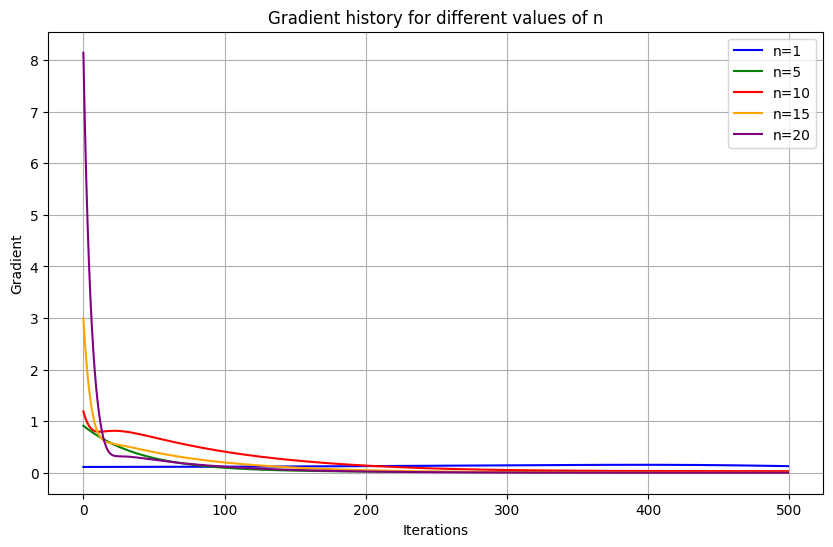

In [ ]:
import matplotlib.pyplot as plt
grad_1, loss_1 = grad_procedure(1) #gradients and losses for n=1
grad_5, loss_5 = grad_procedure(5)
grad_10, loss_10 = grad_procedure(10)
grad_15, loss_15 = grad_procedure(15)
grad_20, loss_20 = grad_procedure(20)

plt.figure(figsize=(10, 6))

plt.plot(grad_1, label='n=1', color='blue')
plt.plot(grad_5, label='n=5', color='green')
plt.plot(grad_10, label='n=10', color='red')
plt.plot(grad_15, label='n=15', color='orange')
plt.plot(grad_20, label='n=20', color='purple')




plt.xlabel('Iterations')
plt.ylabel('Gradient')
plt.title('Gradient history for different values of n')
plt.legend()
plt.grid(True)

plt.show()




### Exercise 3 (1 point)

Clearly, a single activation function is not enough. For example, consider the following Sequential model in Keras:

```
model = Sequential([
  Dense(5),
  ReLU(),
  Dense(1)  
])
```
We would like to replace the intermediate ReLU layer with an equivalent layer implementing (1), where each unit (neuron) in the layer is assigned a different AF. Luckily, we can use `jax.vmap` over the result of Exercise 1 to solve this.

For this exercise, apply `vmap` over `call_fcn` to obtain the following variants:

1.   A single AF (shared parameters) for all the units of the layer.
2.   Different AFs (different parameters) for each unit in the layer.
3. (**Optional, more difficult**) A KAN-style AF [2] where a different AF is applied to each edge of a fully-connected layer.

The signature of all vmapped functions should be:

```
def vmapped_call_fcn(params, x: Float[Array, "b h"])
           -> Float[Array, "b h"]:
   ...
```
where $x$ is a generic output of a fully-connected layer, so that $h$ is the number of hidden units in the layer (e.g., $h=5$ for the first `Dense` layer above). For the new initialization functions, you are free to either rewrite them or find some way to vectorize the original one.

✅ **Completion requirement**: Show me the vectorization works as expected (e.g., generate and visualize multiple functions simultaneously).

In [ ]:
# TODO: complete Exercise 3.

In [ ]:
def vmapped_call_fcn1(params, x: Float[Array, "b h"]) -> Float[Array, "b h"]: #version with shared parameters
   return jax.vmap(call_fcn, in_axes=(None, 0))(params, x)

In [ ]:
def vmapped_call_fcn2(params, x: Float[Array, "b h"]) -> Float[Array, "b h"]: #version with different parameters
   return jax.vmap(call_fcn, in_axes=(0, 0))(params, x)

In [ ]:
def init_fcn2(key, n, h): # New version of the initlisation function. We use this new version to initialiaze parameters of the version with different parameters
   key1, key2, key3, key4 = jax.random.split(key, num=4)
   a = jax.random.normal(key1, shape=(h, n))
   b = jax.random.normal(key2, shape=(h, n))
   c = jax.random.normal(key3, shape=(h, n))
   d = jax.random.normal(key4, shape=(h, n))

   return (a, b, c, d)

In [ ]:
X = jax.random.normal(key, shape=(15,1))
params = init_fcn(key,10)
params2 = init_fcn2(key,10,15)
params2
print(vmapped_call_fcn2(params2,X))
print(vmapped_call_fcn1(params,X))

[[-0.9443778 ]
 [-1.6989639 ]
 [ 0.7205316 ]
 [ 3.786128  ]
 [ 1.638855  ]
 [-0.52901685]
 [-1.5570982 ]
 [ 1.047644  ]
 [-0.19366658]
 [ 4.821905  ]
 [ 1.1582005 ]
 [ 1.2593256 ]
 [-0.32051504]
 [ 5.5278616 ]
 [ 6.117546  ]]
[[ 0.9867832 ]
 [-4.5141463 ]
 [ 0.54044306]
 [-1.8630024 ]
 [ 0.4490473 ]
 [ 1.9941401 ]
 [-0.38566276]
 [ 2.1010845 ]
 [ 1.9693366 ]
 [ 1.7299026 ]
 [-0.33285284]
 [-0.88547647]
 [ 1.6026666 ]
 [ 2.1426234 ]
 [ 2.4021895 ]]


### Exercise 4 (2 point)

It is now time to train an MLP with our new activation functions. To begin with, select any **tabular dataset** that you like, for either classification or regression. A few repositories that you can look at:

1. The catalog of [TensorFlow Datasets](https://www.tensorflow.org/datasets/).
2. The [Kaggle catalog](https://www.kaggle.com/data). For downloading data from Kaggle on Google Colab, you will need to [load your Kaggle authentication token](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb).
3. The [UCI Machine Learning Repository](https://archive.ics.uci.edu/datasets).
4. The [🤗 HuggingFace Datasets](https://huggingface.co/docs/datasets/) repository.

You are not bound to these; any open repository is okay. The choice of dataset will not influence the mark.

The objective of the exercise is to train an MLP with one hidden layer having as activation functions (1). In order to do this you have multiple choices:

1. You can do this completely in JAX by defining a new pair of (init, call) functions describing the complete model and performing gradient descent with these.
2. If you want to use Keras (note: `.fit` is *not allowed*) as in the second lab session, you need to port the trainable function in Keras. My suggestion is to subclass the `Layer` object by wrapping the functions you have already created (https://keras.io/guides/making_new_layers_and_models_via_subclassing/). The resulting layer will be backend-specific, which is not an issue. If you want something slightly harder, you can rewrite everything with Keras ops to make it backend-agnostic.
3. You can also use some high-level JAX library (e.g., Equinox, Haiku, ...). In this case, please document the code precisely.

✍ **DESCRIPTION OF THE DATASET**

*Provide a small description of the dataset below (e.g., source, task, bibliographic reference if necessary...), both as text and in the comments of the code.*

**TODO**: add description here (1-2 paragraphs).

✅ **Completion requirement**: Show me the model trains as expected (e.g., loss, accuracy). It would be nice to visualize the functions before and after training.

In [ ]:
# TODO: complete Exercise 4.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

In [ ]:
data = tfds.load('penguins', as_supervised=True)
#The Penguins dataset is a small dataset that contains biological data for three species of penguins

X, y= data['train'].batch(10000).get_single_element()

In [ ]:
X_train_np = np.array(X)
y_train_np = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_train_np, y_train_np, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((267, 4), (67, 4), (267,), (67,))

In [ ]:
def init_fcn_cnn(key, in_features: int, out_features: int, n:int):
  key1, key2, key3, key4, key5,key6 = jax.random.split(key, num = 6)
  W = jax.random.normal(key1, shape=(in_features, out_features))*0.01
  b0=jax.random.normal(key2, shape=(out_features))
  a= jax.random.normal(key3, shape=(n))
  b= jax.random.normal(key4, shape=(n))
  c = jax.random.normal(key5, shape=(n))
  d = jax.random.normal(key6, shape=(n))
  return (W,b0,a,b,c,d)

In [ ]:
def call_fcn_cnn(params, x: Float[Array, "b"]) -> Float[Array, "h"]:
  W, b0, a, b, c, d = params
  X = jnp.dot(x,W) + b0
  linear_terms = X[:, None] * a[None, :] + b
  sigmoid_terms = X[:, None] * c[None, :] + d
  terms = linear_terms * jax.nn.sigmoid(sigmoid_terms)
  return jax.nn.softmax(jnp.sum(terms, axis=1)) #I put a softmax function here because it's a classification task

In [ ]:
def vmapped_call_fcn_cnn(params, x: Float[Array, "b h"]) -> Float[Array, "b h"]: #version with shared parameters
   return jax.vmap(call_fcn_cnn, in_axes=(None, 0))(params, x)

In [ ]:
from functools import partial
def to_onehot(y: Int[Array, "n"], num_classes) -> Int[Array, "n c"]:
  return jnp.eye(num_classes)[y]

to_onehot_3 = partial(to_onehot, num_classes=3)

In [ ]:
def accuracy(y: Float[Array, "n"], y_pred: Float[Array, "n 3"]):
  return (y == y_pred.argmax(axis=1)).mean()

In [ ]:
@jax.vmap
def cross_entropy(y: Float[Array, "c"], y_pred: Float[Array, "c"]) -> Float[Array, ""]:
  return -(y*jnp.log(y_pred)).sum()

In [ ]:
@jax.jit
@jax.value_and_grad
def loss(params):
  return cross_entropy(to_onehot_3(jnp.array(y_train)), vmapped_call_fcn_cnn(params, jnp.array(X_train))).mean()

In [ ]:
params_cnn = init_fcn_cnn(key, 4,3,50)
test = params_cnn[2]
accuracy_history = []
loss_history_cnn = []
grad_history_cnn = []
for i in range(2000):
   l, g = loss(params_cnn)
   grad_w = g[0]
   accuracy_history.append(accuracy(y_train , vmapped_call_fcn_cnn(params_cnn,X_train)))
   grad_history_cnn.append(jnp.linalg.norm(grad_w))
   loss_history_cnn.append(l)
   params_cnn = jax.tree.map(lambda p, grad_p: p - 0.01*grad_p, params_cnn, g)

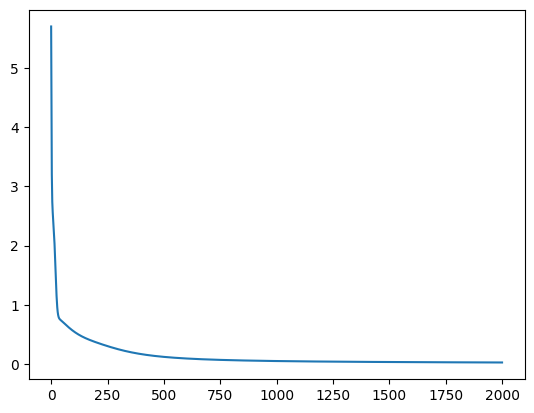

In [ ]:
plt.plot(grad_history_cnn)

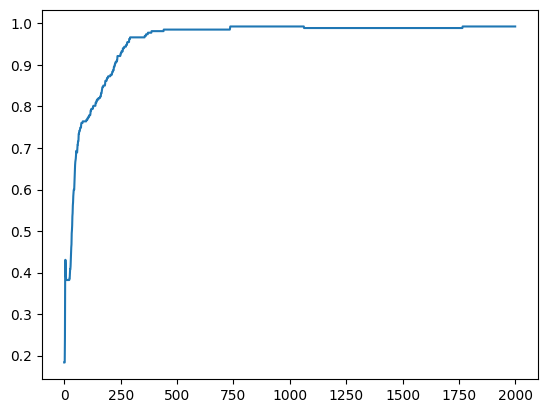

In [ ]:
plt.plot(accuracy_history)

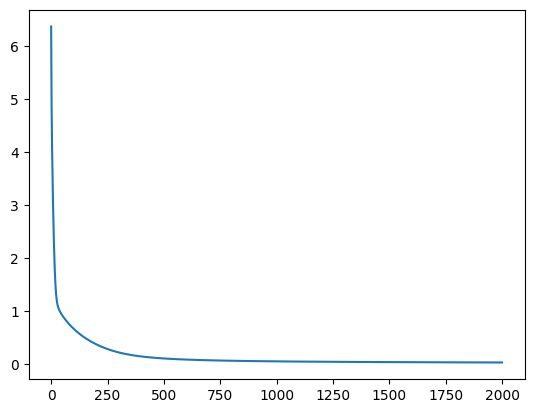

In [ ]:
plt.plot(loss_history_cnn)

### Exercise 5 (optional, ungraded)

It could happen that the model does not work as expected because the parameters of the AF collapse to some "weird" behaviour. We can partially solve this by imposing a **regularization** term on the loss that penalizes deviations from the initialization.

For example, suppose that CE is the cross-entropy loss, and we initialize our AFs as the ReLU. If we have a single AF for simplicity, we can penalize deviations from the initialization as:

$$ \arg\min \sum_z \text{CE}(y_z, \hat{y}_z) + \lambda \sum_{i} (\phi(s_i) - \text{ReLU}(s_i))^2 \tag{2} $$

where $z$ loops over the training dataset, $\lambda\ge 0$ is a hyper-parameter that balances the strength of the regularization, and $s_i$ are a set of points sampled on the x-axis (the more points we sample, the stronger the regularization). This can be extended trivially to multiple AFs by summing over the different functions.

For this exercise, modify the training from Exercise 4 by including a term as in (2) (not necessarily the same, it is enough that it has a similar effect).


In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

✅ **Completion requirement**: Show me regularization works as expected (e.g., compare the trained AFs to those from Exercise 4).

In [ ]:
# TODO: complete exercise 5.

### Final checklist

1. Carefully check all code. Insert comments when needed. Search for "TODO" to see if you forgot something.
2. Run everything one final time. *Please do not send me notebooks with errors or cells that are not working.*
3. Upload the completed notebook **before 13/11/2024 23:59** on the Google Classrom page.

### References

[1] Apicella, A., Donnarumma, F., Isgrò, F. and Prevete, R., 2021. A survey on modern trainable activation functions. Neural Networks, 138, pp. 14-32.

[2] Liu, Z., Wang, Y., Vaidya, S., Ruehle, F., Halverson, J., Soljačić, M., Hou, T.Y. and Tegmark, M., 2024. KAN: Kolmogorov-Arnold networks. arXiv preprint arXiv:2404.19756.